<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

---

## Problem Statement

SAT and ACT exams have always been a cornerstone of American college culture. It is common knowledge that colleges and universities in the US place great emphasis on SAT or ACT scores as a tool to quantify the readiness of a student for their rigorous curriculum. In fact, some states have compulsory testing on either the SAT or ACT. However, many people refute the effectiveness of this compulsion, which is the basis of this project. 

In this project, my goals are to:

- Determine if compulsory testing means getting good results
- If not, find the underlying reason as to why this is the case
- Find a way to improve the overall results

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Datasets selected

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State

### Outside Research

Below is a table retrieved from ACT website which will be useful in giving the scaled score used in ACT rubrics some context.

|Scale score|English|Math|Reading|Science|
|-----------|-------|----|-------|-------|
|36|75|59-60|40|40|
|35|73-74|57-58|39|39|
|34|71-72|55-56|38|38|
|33|70|54|-|37|
|32|69|53|37|-|
|31|68|52|36|36|
|30|67|50-51|35|35|
|29|66|49|34|34|
|28|64-65|47-48|33|33|
|27|62-63|45-46|32|31-32|
|26|60-61|43-44|31|30|
|25|58-59|41-42|30|28-29|
|24|56-57|38-40|29|26-27|
|23|53-55|36-37|27-28|24-25|
|22|51-52|34-35|26|23|
|21|48-50|33|25|21-22|
|20|45-47|31-32|23-24|19-20|
|19|42-44|29-30|22|17-18|
|18|40-41|27-28|20-21|16|
|17|38-39|24-26|19|14-15|
|16|35-37|19-23|18|13|
|15|33-34|15-18|16-17|12|
|14|30-32|12-14|14-15|11|
|13|29|10-11|13|10|
|12|27-28|8-9|11-12|9|
|11|25-26|6-7|9-10|8|
|10|23-24|5|8|7|
|9|20-22|4|7|6|
|8|17-19|-|6|5|
|7|14-16|3|5|4|
|6|11-13|-|4|3|
|5|9-10|2|3|-|
|4|6-8|-|-|2|
|3|5|1|2|1|
|2|3-4|-|1|-|
|1|0-2|0|0|0|

Source: _Preparing for the ACT_, https://www.act.org/content/dam/act/unsecured/documents/Preparing-for-the-ACT.pdf

### Coding Challenges

1. Manually calculate mean:

In [1]:
list_a = [1,2,3,4,5,6]

def calc_mean(list_):
    return sum(list_)/len(list_)
    
calc_mean(list_a)

3.5

2. Manually calculate standard deviation:

In [2]:
def calc_sd(list_):
    summation = 0
    for i in list_:
        summation += (i - calc_mean(list_))**2
    return (summation/len(list_))**0.5
        
calc_sd(list_a)

1.707825127659933

3. Convert to float function:

In [3]:
sample_string = "30.5%"

def conv_float(string_):
    return float(string_.replace(('%'), (''))) / 100

conv_float(sample_string)

0.305

--- 
# Part 2

---

## Libraries Used

In [4]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

## Data Import and Cleaning

In [5]:
# read in relevant csvs

act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')

Several things to take note of:

1. Composite score is the average of scaled score for each section.
2. For reference to scaled score, see above table.
3. Participation percentage refers to the amount of total high school graduates who chose to take that test.
4. Participations %s for ACT and SAT will not necessarily add up to 100 as some will opt to take both.

In [6]:
# showing the first 5 rows of csv

act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [7]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [8]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [9]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [10]:
# check if dtypes are correct
# note composite column is dtype object. to rectify.

act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [11]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [12]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [14]:
# showing summarized data on csv, including number of entries and other statistical data
# note the unusually low min. in the Science column

act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [15]:
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [16]:
# note the unusually low min in Math column

sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [17]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [18]:
# checking if there are any missing values for all dataframes

act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [19]:
act_2018.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [20]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [21]:
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

Analyzing the above gives us the following conclusions:
    
    
- There are 51 rows in SAT data, but 52 rows in ACT data (inclusive of header row). At a glance we can tell that this is due to ACT data including the national data for year 2017.

    1. The national data row in ACT 2017 will be removed.
    
    
- However, ACT 2018 data does **NOT** include national data and yet it has 52 rows. Upon investigating, we found that Maine appeared twice in the data with exact values.

    2. One cloned row of Maine in ACT 2018 will be removed.
    
    
- There does not appear to be any obvious missing values (in the form of "0"s or "NaN"s). The data is complete.


- ACT data from 2017, specifically the composite column, is dtype object. 

    3. Composite column from ACT 2017 will be converted to float in order for it to be consistent with the data from 2018.
    

- While performing task 4, error was returned that object 50 was a unconvertable string. Upon investigating, we found that the value for composite for row 51 in ACT 2017 was "20.2x".

    4. Change value of column composite, row 51 of ACT 2017 to "20.2"
    
    
- Participation columns in all dataframes are in percentages.

    5. Participation data in all dataframes will be converted to float.
    
 
- The District of Columbia in ACT 2018 is passed as "District of columbia" which is inconsistent with the other dataframes.

    6. Rename "District of columbia" to "District of Columbia" in ACT 2018.
    
    
- SAT 2017 score has a minimum of 52 for Math, which does not make sense because SAT scores range from 200 - 800. Upon investigating, we found that the mean Math score for Maryland was 52.

    7. Since we know the Total and EBRW scores for Maryland, and because those scores look correct, we will take the difference between those scores as the mean Math score for Maryland instead. 
    
    
- ACT 2017 score has a minimum of 2.3 for Science, which is slightly suspicious. Upon investigating, we found that the mean Science score for Maryland was 2.3. Reverse calculating using the composite score, we found an error.

    8. Update the Science score of Maryland for ACT 2017 to 23.8.

In [22]:
# 1. removing national row for ACT 2017

act_2017.drop(0, inplace = True)

# 2. remove cloned row of Maine for ACT 2018

act_2018.drop(19, inplace = True)

# 4. change value of composite column row 51 for ACT 2017 to "20.2"

act_2017['Composite'].replace('20.2x', '20.2', inplace = True)

# 3. convert composite column to float for ACT 2017

act_2017['Composite'] = pd.to_numeric(act_2017['Composite'], errors = 'coerce')

# 5. convert all participation percentages to float

act_2017['Participation'] = act_2017['Participation'].map(lambda i: conv_float(i))
act_2018['Participation'] = act_2018['Participation'].map(lambda i: conv_float(i))
sat_2017['Participation'] = sat_2017['Participation'].map(lambda i: conv_float(i))
sat_2018['Participation'] = sat_2018['Participation'].map(lambda i: conv_float(i))

# 6. rename "District of columbia" to "District of Columbia" in ACT 2018

act_2018['State'].replace('District of columbia', 'District of Columbia', inplace = True)

# 7. correct the mean Math score for Maryland in SAT 2017

sat_2017['Math'].replace(52, 524, inplace = True)

# 8. correct the mean Science score for Maryland in ACT 2017

act_2017['Science'].replace(2.3, 23.8, inplace = True)

Now we rename columns so that they will not cause issues in the future when we use them and merge dataframes.

In [23]:
# renaming all ACT and SAT columns to lowercase, replacing spaces with underscores and making them more informative

act_2017.rename(columns = {
    'State' : 'state',
    'Participation' : 'act_participation_2017',
    'English' : 'act_english_2017',
    'Math' : 'act_math_2017',
    'Reading' : 'act_reading_2017',
    'Science' : 'act_science_2017',    
    'Composite' : 'act_composite_2017',
}
               , inplace = True)


act_2018.rename(columns = {
    'State' : 'state',
    'Participation' : 'act_participation_2018',
    'Composite' : 'act_composite_2018',
}
               , inplace = True)


sat_2017.rename(columns = {
    'State' : 'state',
    'Participation' : 'sat_participation_2017',
    'Evidence-Based Reading and Writing' : 'sat_ebrw_2017',
    'Math' : 'sat_math_2017',
    'Total' : 'sat_total_2017',
}
               , inplace = True)


sat_2018.rename(columns = {
    'State' : 'state',
    'Participation' : 'sat_participation_2018',
    'Evidence-Based Reading and Writing' : 'sat_ebrw_2018',
    'Math' : 'sat_math_2018',
    'Total' : 'sat_total_2018',
}
               , inplace = True)

In [24]:
# merging relevant dataframes, overwriting on states

merged_2017 = sat_2017.merge(act_2017, 'outer', 'state')
merged_2018 = sat_2018.merge(act_2018, 'outer', 'state')
merged_final = merged_2017.merge(merged_2018, 'outer', 'state')

In [25]:
# saving the new dataframes

merged_2017.to_csv('../data/merged_2017.csv')
merged_2018.to_csv('../data/merged_2018.csv')
merged_final.to_csv('../data/merged_final.csv')

In [26]:
# check one final time for any dtype errors

merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_participation_2017  51 non-null     float64
 2   sat_ebrw_2017           51 non-null     int64  
 3   sat_math_2017           51 non-null     int64  
 4   sat_total_2017          51 non-null     int64  
 5   act_participation_2017  51 non-null     float64
 6   act_english_2017        51 non-null     float64
 7   act_math_2017           51 non-null     float64
 8   act_reading_2017        51 non-null     float64
 9   act_science_2017        51 non-null     float64
 10  act_composite_2017      51 non-null     float64
 11  sat_participation_2018  51 non-null     float64
 12  sat_ebrw_2018           51 non-null     int64  
 13  sat_math_2018           51 non-null     int64  
 14  sat_total_2018          51 non-null     int6

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|All|Name of state| 
|**sat_participation_2017**|*float*|SAT 17|The percent of high school graduates in 2017 who took the SAT test (units percent to two decimal places 98.10 means 98.1%)|
|**sat_ebrw_2017**|*integer*|SAT 17|Mean state-wide score for the Evidence-Based Reading and Writing (EBRW) section of SAT test (200 - 800)|
|**sat_math_2017**|*integer*|SAT 17|Mean state-wide score for the Math section of SAT test (200 - 800)|
|**sat_total_2017**|*integer*|SAT 17|Mean state-wide total score for the SAT test (exclusive of optional Essay section) (400 - 1600)|
|**act_participation_2017**|*float*|ACT 17|The percent of high school graduates in 2017 who took the ACT test (units percent to two decimal places 98.10 means 98.1%)|
|**act_english_2017**|*float*|ACT 17|Mean scaled score for the English section of ACT test (1 - 36)|
|**act_math_2017**|*float*|ACT 17|Mean scaled score for the Math section of ACT test (1 - 36)|
|**act_reading_2017**|*float*|ACT 17|Mean scaled score for the Reading section of ACT test (1 - 36)|
|**act_science_2017**|*float*|ACT 17|Mean scaled score for the Science section of ACT test (1 - 36)|
|**act_composite_2017**|*float*|ACT 17|The average of each individual section of the ACT test (1 - 36)|
|**sat_participation_2018**|*float*|SAT 18|The percent of high school graduates in 2018 who took the SAT test (units percent to two decimal places 98.10 means 98.1%)|
|**sat_ebrw_2018**|*integer*|SAT 18|Mean state-wide score for the Evidence-Based Reading and Writing (EBRW) section of SAT test (200 - 800)|
|**sat_math_2018**|*integer*|SAT 18|Mean state-wide score for the Math section of SAT test (200 - 800)|
|**sat_total_2018**|*integer*|SAT 18|Mean state-wide total score for the SAT test (exclusive of optional Essay section) (400 - 1600)|
|**act_participation_2018**|*float*|ACT 18|The percent of high school graduates in 2018 who took the ACT test (units percent to two decimal places 98.10 means 98.1%)|
|**act_composite_2018**|*float*|ACT 18|The average of each individual section of the ACT test (not available) (1 - 36)|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.
   

In [27]:
# summary statistics

merged_final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_ebrw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.462745,1.753392,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


The conclusions that can be drawn from just the summary statistics are as follows:

1. SAT medians are consistently lower than the mean in both years. Furthermore, the distance between its 2nd interquartile range is consistently lower than its 3rd. This implies a slight right skew for all SAT tests. Since SAT tests are not bell-curve predetermined, we can conclude that SAT tests are a little bit more difficult than what the average graduate is prepared to handle. This effect is also seen in ACT scores, but to a lower degree.


2. The average student (mean) achieves a total score of 1123 out of 1600 for the SAT, which is 70.19%. They achieve a composite score of 21.5 out of 36, which is 59.7%. However, because the composite score rubric for the ACT is not linearly scaled, we cannot come to a conclusion on its actual difficulty.

In [28]:
# prepping dataframe for conversion to dictionary and applying function

merged_final_func = merged_final.drop('state', axis = 1)

# applying calc_sd function to array
sd = {k:calc_sd(v) for (k, v) in merged_final_func.items()}

sd

{'sat_participation_2017': 0.3492907076664507,
 'sat_ebrw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7361170088327353,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 0.3694661922353942,
 'sat_ebrw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 0.33701735820410317,
 'act_composite_2018': 2.090779082141178}

In [29]:
# sorting SAT 2017 in descending order, until first non 100% participation rate
merged_final.sort_values('sat_participation_2017', ascending = False)[['state', 'sat_participation_2017']].head()

,state,sat_participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [30]:
# sorting SAT 2017 in ascending order, bottom 5
merged_final.sort_values('sat_participation_2017')[['state', 'sat_participation_2017']].head()

,state,sat_participation_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In the 2017 SAT exam, the District of Columbia, Michigan, Connecticut and Delaware had 100% participation rates, followed closely behind by New Hampshire which had 96% participation rate. On the other hand, North Dakota, Mississippi, Iowa, Missouri and Utah had the lowest participation rates at 2 to 3 %.

In [31]:
# sorting ACT 2017 in descending order, until first non 100% participation rate
merged_final.sort_values('act_participation_2017', ascending = False)[['state', 'act_participation_2017']].head(18)

,state,act_participation_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


In [32]:
# sorting ACT 2017 in ascending order, bottom 5
merged_final.sort_values('act_participation_2017')[['state', 'act_participation_2017']].head()

,state,act_participation_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In the 2017 ACT exam, there were 17 states that had perfect participation rates. On the other hand, Maine, New Hampshire, Delaware, Rhode Island and Pennsylvania had the lowest participation rates.


There are a few points of interest:

1. The lowest participation rates for the ACT is much higher than the lowest participation rates for the SAT.

2. North Dakota, Mississippi, Utah and Missouri had great ACT participation rates but poor SAT participation rates.

3. New Hampshire and Delaware had great SAT participation rates but poor ACT participation rates.

In [33]:
# sorting SAT 2018 in descending order, until first non 100% participation rate
merged_final.sort_values('sat_participation_2018', ascending = False)[['state', 'sat_participation_2018']].head(6)

,state,sat_participation_2018
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99


In [34]:
# sorting SAT 2018 in ascending order, bottom 5
merged_final.sort_values('sat_participation_2018')[['state', 'sat_participation_2018']].head()

,state,sat_participation_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In the 2018 SAT exam, Colorado, Connecticut, Delaware, Michigan and Idaho all had 100% participation rates, followed closely behind by Maine which had 99% participation rate. On the other hand, North Dakota, Wyoming, South Dakota, Nebraska and Wisconsin had the lowest participation rates at 2 to 3 %.

In [35]:
# sorting ACT 2018 in descending order, until first non 100% participation rate
merged_final.sort_values('act_participation_2018', ascending = False)[['state', 'act_participation_2018']].head(18)

,state,act_participation_2018
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


In [36]:
# sorting ACT 2018 in ascending order, bottom 5
merged_final.sort_values('act_participation_2018')[['state', 'act_participation_2018']].head()

,state,act_participation_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In the 2018 ACT exam, there were again 17 states with perfect participation rates. On the other hand, Maine, New Hampshire, Delaware, Rhode Island and Pennsylvania had yet again the lowest participation rates.

There are a few points of interest:

1. The lowest participation rates for the ACT is still much higher than the lowest participation rates for the SAT.

2. The same few states with great ACT participation rates maintained poor SAT participation rates.

3. The same few states with great SAT participation rates maintained poor ACT participation rates.

4. Via comparison of 2017 and 2018, we can see that almost all of the states that reached a 100% participation rate on either test managed to maintain that participation rate.

This leads to a preliminary conclusion that:

1. **The ACT is more popular than the SAT.** 

    a. This is certainly true for certain states, and the reverse is also true for other states. 

    b. There is likely a reason for 100% participation rates. 

In [37]:
# showing sat participation for both years side by side in descending order

merged_final.sort_values(
    ['sat_participation_2017', 
     'sat_participation_2018'], 
    ascending = False)[
    ['state',
     'sat_participation_2017',
     'sat_participation_2018']
].head()

,state,sat_participation_2017,sat_participation_2018
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
22,Michigan,1.00,1.00
8,District of Columbia,1.00,0.92
29,New Hampshire,0.96,0.96


Comparing the participation rate of the states with 100% participation in 2017 with 2018, we can see that for the SAT, only the District of Columbia failed to maintain their 100% participation rate.

In [38]:
# showing act participation for both years side by side in descending order

merged_final.sort_values(
    ['act_participation_2017', 
     'act_participation_2018'], 
    ascending = False)[
    ['state',
     'act_participation_2017',
     'act_participation_2018']
].head(18)

,state,act_participation_2017,act_participation_2018
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00
24,Mississippi,1.00,1.00
25,Missouri,1.00,1.00
26,Montana,1.00,1.00
28,Nevada,1.00,1.00
33,North Carolina,1.00,1.00
36,Oklahoma,1.00,1.00


Doing the same but for ACT this time, we can see that the trend remains the same but with one exception. Colorado took a major hit to their participation rate, falling from 100% to 30%. This raised a suspicion of unclean data, so I cross-referenced it with an official ACT document (source: https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Colorado-CCCR-2018.pdf) and found that the data was correct and this was simply an outlier.

I suspected that this fall would coincide with a drastic increase in SAT participation rate for Colorado in 2018, so I decided to verify my suspicions.

In [39]:
# comparing colorado's sat participation by year

merged_final.loc[(merged_final['state'] == 'Colorado'), ['state', 'sat_participation_2017', 'sat_participation_2018']]

,state,sat_participation_2017,sat_participation_2018
5,Colorado,0.11,1.0


It became obvious now that Colorado had switched from compulsory ACT participation to compulsory SAT participation. I verified this was the case online (source: https://www.testive.com/colorado-sat-change-2017/). From this point on, I worked with the assumption that **100% participation rates are simply states which made that particular test compulsory.**

However, state-mandated tests did not explain the small increases in SAT participation for other states which were not 100%. Upon digging deeper, I found that the reason this occurred was because **several states' Board of Education had decided to waiver the fee for the SAT in 2018** (source: https://newsroom.collegeboard.org/more-2-million-students-class-2018-took-sat-highest-ever). Intuitively, waiving the fee for a test would increase the participation rate of the test, but I suspected that this was not necessarily a good thing.

In [40]:
# filtering out states with more than 50% participation rate on both tests in 2017

merged_final.loc[
    (merged_final['sat_participation_2017'] > 0.5) &
    (merged_final['act_participation_2017'] > 0.5),
    ['state',
     'sat_participation_2017',
     'act_participation_2017'
    ]
]

,state,sat_participation_2017,act_participation_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [41]:
# filtering out states with more than 50% participation rate on both tests in 2018

merged_final.loc[
    (merged_final['sat_participation_2018'] > 0.5) &
    (merged_final['act_participation_2018'] > 0.5),
    ['state',
     'sat_participation_2018',
     'act_participation_2018'
    ]
]

,state,sat_participation_2018,act_participation_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


By comparing states with a healthy mix of both SAT and ACT takers, it was found that Florida, Georgia and Hawaii had greater than 50% participation rate for both tests for both years.

There are several points of interest in this comparison:

1. Florida has a similar number of graduates taking the SAT or the ACT (some are even taking both, proven by the fact that both rates added up **exceeds** 100%)

2. Hawaii still heavily favours the ACT in both years, but are open to taking the SAT.

3. North and South Carolina experienced a massive increase in ACT participation rate, going from sub 50% to 100%.

4. There are **no** states that made both SAT and ACT compulsory.

Point 3 illustrated that **just as some states made SAT mandatory, others also chose to make ACT mandatory,** in this case Carolina (source: https://www.nytimes.com/2018/04/05/education/learning/act-sat-college-entrance-exam.html).

In [42]:
# finding total/composite scores and comparing them to participation rate
# act 2017, highest mean composite scores

merged_final.sort_values(
    ['act_composite_2017', 
     'act_participation_2017'], 
    ascending = False)[
    ['state',
     'act_composite_2017',
     'act_participation_2017']
].head()

,state,act_composite_2017,act_participation_2017
29,New Hampshire,25.5,0.18
21,Massachusetts,25.4,0.29
6,Connecticut,25.2,0.31
19,Maine,24.3,0.08
8,District of Columbia,24.2,0.32


In [43]:
# act 2017, lowest mean composite scores

merged_final.sort_values(
    ['act_composite_2017', 
     'act_participation_2017']
)[
    ['state',
     'act_composite_2017',
     'act_participation_2017']
].head()

,state,act_composite_2017,act_participation_2017
28,Nevada,17.8,1.0
24,Mississippi,18.6,1.0
40,South Carolina,18.7,1.0
11,Hawaii,19.0,0.9
33,North Carolina,19.1,1.0


It is interesting to note that the highest composite means had a very low participation rate and vice versa. I suspect the same will occur for ACT 2018.

In [44]:
# act 2018, highest mean composite scores

merged_final.sort_values(
    ['act_composite_2018', 
     'act_participation_2018'],
    ascending = False
)[
    ['state',
     'act_composite_2018',
     'act_participation_2018']
].head()

,state,act_composite_2018,act_participation_2018
6,Connecticut,25.6,0.26
21,Massachusetts,25.5,0.25
29,New Hampshire,25.1,0.16
32,New York,24.5,0.27
22,Michigan,24.2,0.22


In [45]:
# act 2018, lowest mean composite scores

merged_final.sort_values(
    ['act_composite_2018', 
     'act_participation_2018']
)[
    ['state',
     'act_composite_2018',
     'act_participation_2018']
].head()

,state,act_composite_2018,act_participation_2018
28,Nevada,17.7,1.00
40,South Carolina,18.3,1.00
24,Mississippi,18.6,1.00
11,Hawaii,18.9,0.89
0,Alabama,19.1,1.00


What happened in 2017 repeated itself in 2018. Now let us see if it will be the same for the SAT.

In [46]:
# sat 2017, highest mean composite scores

merged_final.sort_values(
    ['sat_total_2017', 
     'sat_participation_2017'], 
    ascending = False)[
    ['state',
     'sat_total_2017',
     'sat_participation_2017']
].head()

,state,sat_total_2017,sat_participation_2017
23,Minnesota,1295,0.03
49,Wisconsin,1291,0.03
15,Iowa,1275,0.02
25,Missouri,1271,0.03
16,Kansas,1260,0.04


In [47]:
# sat 2017, lowest mean composite scores

merged_final.sort_values(
    ['sat_total_2017', 
     'sat_participation_2017']
)[
    ['state',
     'sat_total_2017',
     'sat_participation_2017']
].head()

,state,sat_total_2017,sat_participation_2017
8,District of Columbia,950,1.00
7,Delaware,996,1.00
12,Idaho,1005,0.93
22,Michigan,1005,1.00
19,Maine,1012,0.95


In [48]:
# sat 2018, highest mean composite scores

merged_final.sort_values(
    ['sat_total_2018', 
     'sat_participation_2018'], 
    ascending = False)[
    ['state',
     'sat_total_2018',
     'sat_participation_2018']
].head()

,state,sat_total_2018,sat_participation_2018
23,Minnesota,1298,0.04
49,Wisconsin,1294,0.03
34,North Dakota,1283,0.02
16,Kansas,1265,0.04
15,Iowa,1265,0.03


In [49]:
# sat 2018, lowest mean composite scores

merged_final.sort_values(
    ['sat_total_2018', 
     'sat_participation_2018']
)[
    ['state',
     'sat_total_2018',
     'sat_participation_2018']
].head()

,state,sat_total_2018,sat_participation_2018
8,District of Columbia,977,0.92
7,Delaware,998,1.00
48,West Virginia,999,0.28
12,Idaho,1001,1.00
44,Utah,1010,0.04


The same did occur for the SAT, especially for high mean totals, but there was a difference. There were states with both low participation rate and low mean totals.

This leads me to another preliminary conclusion:

2. **The states with a (relative to other states) low mean total and low participation rate have failing education systems.**

    a. Students who are not mandated by the state to take a particular test (hence a low participation rate) is more likely to perform well. Since these students are going out of their way to take the test, we can assume that they are the academic type.
    
    b. Thus, it is natural for a state with mandated tests to have a lower mean total, as the sample population would include students of all academic ability.
    
    c. Therefore, from point b, we can conclude that a state with mandated tests AND a high mean total would have an excellent education system.
    
    d. The opposite logic would imply that a low participation rate and a low mean total would have a failing education system.

## Visualize the Data

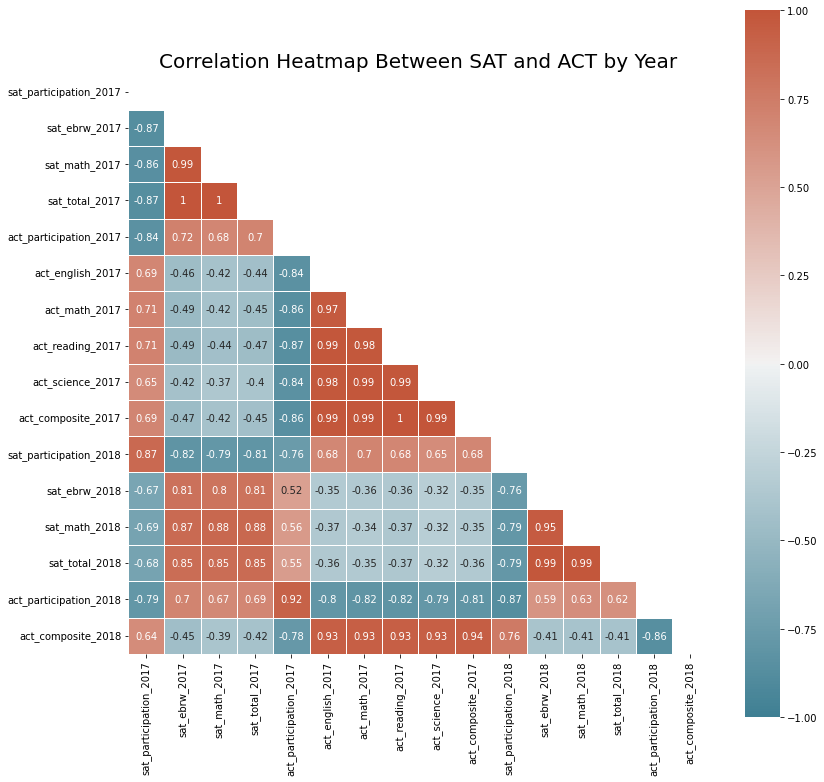

In [50]:
# utilizing seaborn to create a heatmap to show correlations between variables, if any

plt.figure(figsize = (13, 13))
plt.title('Correlation Heatmap Between SAT and ACT by Year', fontsize = 20)
mask_ = np.zeros_like(merged_final.corr())
mask_[np.triu_indices_from(mask_)] = True
cmap_ = sns.diverging_palette(220, 20, as_cmap = True)
sns.heatmap(merged_final.corr(), cmap = cmap_, mask = mask_, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5);

Glancing over the obvious correlations (eg. act_english_2017 being correlated to act_composite_2017), we have the following observations:

1. Scores for a given section are almost perfectly correlated (r > 0.97) with other sections of the same test in the same year.

    - Conclusion drawn is that **if a student performs well for a section, they perform just as well for the other sections, and the converse holds true.**
    

2. Scores for a given section are less correlated, but still significantly correlated (r > 0.8) with other sections of the same test in **different** years.

    - Conclusion drawn is that **tests are of different difficulties, significant enough that it causes a student who did well for 2017 to not do as well (or do better) for 2018.**
    

3. ACT participation and SAT participation in the same year have a high negative correlation (r < -0.8).

    - Conclusion drawn is that **a significant portion of the graduating cohort takes either the ACT or SAT, with few opting to take both.**
    

4. Test participation for different years have a high correlation (r > 0.87).

    - Conclusion drawn is that **most states choose to stick with the same test as the year before.**
    
    
5. Test mean composite / total scores are highly negatively correlated (r < -0.84) to their respective participation rates.

    - Conclusion drawn is that **the students who take an unpopular test in their state are more likely to do well, which corroborates with conclusion 2a.**
    

6. Interestingly, SAT results and ACT results in the same year have a moderate negative correlation, with r being around -0.45.

    - Not much can be concluded from this observation.

In [51]:
# creating a function to plot histograms

def plot_hist(data_1, 
              xlabel_1, 
              title_1, 
              data_2, 
              xlabel_2, 
              title_2, 
              data_3, 
              xlabel_3, 
              title_3, 
              data_4, 
              xlabel_4, 
              title_4, 
              bins_, 
              kde_, 
              sharey_
             ):
    
    fig, ax = plt.subplots(2, 2, sharey = sharey_, figsize = (12, 10)) # setting up subplots
    
    sns.histplot( # setting up histplot 1
        merged_final[data_1],
        bins = bins_, 
        kde = kde_, 
        ax = ax[0, 0]
        ).set(
            xlabel = xlabel_1,
            title = title_1
        )

    sns.histplot( # setting up histplot 2
        merged_final[data_2], 
        bins = bins_, 
        kde = kde_, 
        ax = ax[0, 1]
        ).set(
            xlabel = xlabel_2,
            title = title_2
        )

    sns.histplot( # setting up histplot 3
        merged_final[data_3], 
        bins = bins_, 
        kde = kde_, 
        ax = ax[1, 0]
        ).set(
            xlabel = xlabel_3,
            title = title_3
        )

    sns.histplot( # setting up histplot 4
        merged_final[data_4], 
        bins = bins_, 
        kde = kde_, 
        ax = ax[1, 1]
        ).set(
            xlabel = xlabel_4,
            title = title_4
        )

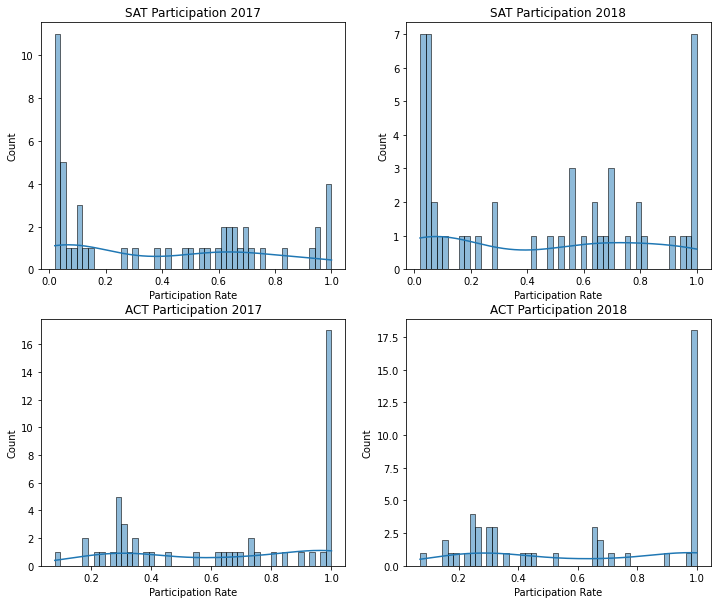

In [52]:
plot_hist(
    'sat_participation_2017',
    'Participation Rate',
    'SAT Participation 2017',
    'sat_participation_2018', 
    'Participation Rate',
    'SAT Participation 2018',
    'act_participation_2017',
    'Participation Rate',
    'ACT Participation 2017',
    'act_participation_2018', 
    'Participation Rate',
    'ACT Participation 2018',    
    50, 
    True, 
    False
)

It can be seen that the distributions for both tests in 2018 are very similar to their previous year. There might have been a few shifts in preference in certain states but we are unable to tell.

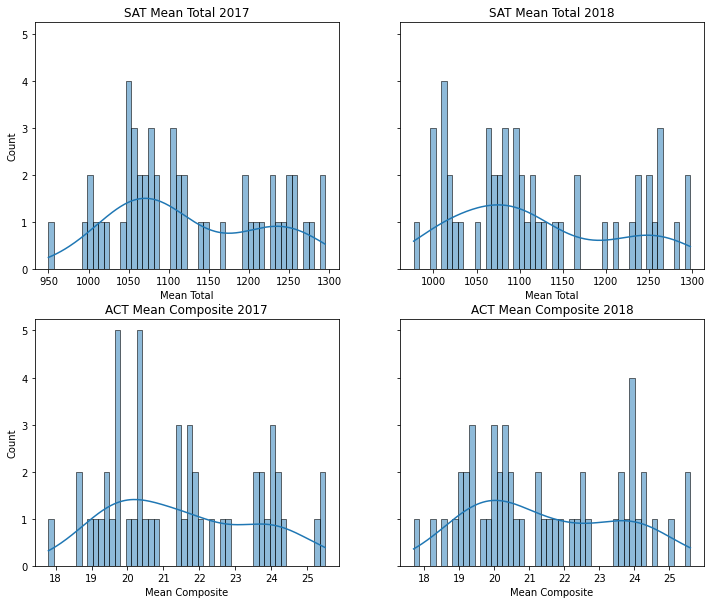

In [53]:
plot_hist(
    'sat_total_2017',
    'Mean Total',
    'SAT Mean Total 2017',
    'sat_total_2018', 
    'Mean Total',
    'SAT Mean Total 2018',
    'act_composite_2017',
    'Mean Composite',
    'ACT Mean Composite 2017',
    'act_composite_2018', 
    'Mean Composite',
    'ACT Mean Composite 2018',    
    50, 
    True, 
    True
)

The distributions are bimodal for both the SAT and ACT, with very similar distributions for each test per year. The mean total for SAT has slightly more defined peaks. These histograms further corroborate the hypothesis that there are two categories of students taking each test, with the first being state-mandated students who perform below average, and the other being non-state-mandated students who perform above average.

A normal mean histogram should follow the central limit theorem, in which the distribution would tend to a normal distribution. The condition for this theorem to apply, however, is that the sample size must be selected randomly with replacement. Since we can clearly see that this data represents the entire population, there is no sample size involved and thus the central limit theorem does not apply.

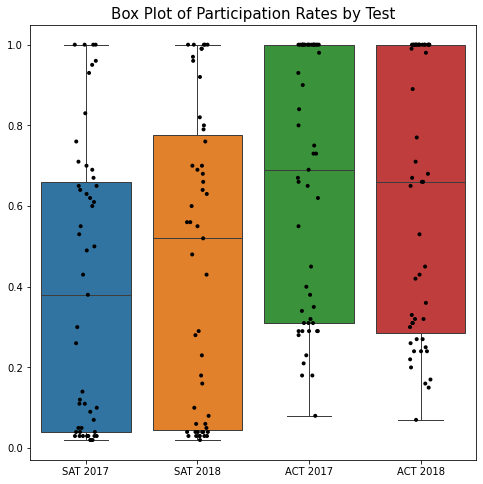

In [54]:
# repeat the comparison of participation rates in a box plot instead

plt.figure(figsize = (8, 8))


renamed_merged_final = merged_final.loc[
        :, 
        [
            'sat_participation_2017', 
            'sat_participation_2018', 
            'act_participation_2017', 
            'act_participation_2018'
        ]
    ].rename(
    columns = {
        'sat_participation_2017' : 'SAT 2017',
        'sat_participation_2018' : 'SAT 2018',
        'act_participation_2017' : 'ACT 2017',
        'act_participation_2018' : 'ACT 2018'
    }
)

plt.title('Box Plot of Participation Rates by Test', fontsize = 15)
sns.boxplot(data = renamed_merged_final, linewidth = 1)
sns.stripplot(data = renamed_merged_final, size = 4, color = 'black', linewidth = 0);

This boxplot lends further credence that the ACT test was much more popular than the SAT test in both years, but it also shows us that in 2018, it had made significant strides to catch up. ACT in 2018, however, had actually fallen in popularity.

However, based on the density of students in the extremities of the boxes, it can be seen that **majority of the takers are still mandated by their state to take their respective tests, with more states having ACT as their compulsory test.**

The states can be classified into ACT compulsory, SAT compulsory or either. This should give us a clearer overall picture. Source of this is from https://magoosh.com/hs/sat/states-that-require-the-act-or-sat/.

In [80]:
act_compulsory = [ # classifying states whether they are ACT, SAT or either compulsory
    'Alabama',
    'Hawaii',
    'Kentucky',
    'Louisiana',
    'Mississippi',
    'Missouri',
    'Montana',
    'Nebraska',
    'Nevada',
    'North Carolina',
    'South Carolina',
    'Utah',
    'Wisconsin',
    'Wyoming'
]

sat_compulsory = [
    'Colorado',
    'Connecticut',
    'Delaware',
    'District of Columbia',
    'Illinois',
    'Maine',
    'Michigan',
    'New Hampshire'
]

either_compulsory = [
    'Idaho',
    'Ohio',
    'Tennessee'
]

def compulsory(row):
    if row['state'] in act_compulsory:
        row['Compulsory'] = 'ACT Compulsory'
    elif row['state'] in sat_compulsory:
        row['Compulsory'] = 'SAT Compulsory'
    elif row['state'] in either_compulsory:
        row['Compulsory'] = 'Either Compulsory'
    else:
        row['Compulsory'] = 'Optional'
    return row

# adding the new list to the dataframe
merged_final_compulsory = merged_final.apply(compulsory, axis = 1)

In [83]:
# creating a function to plot scatterplots

def plot_scatter(data_x, xlabel_, data_y, ylabel_, title):
    plt.figure(figsize = (6, 6))
    sns.scatterplot(data=merged_final_compulsory, x = data_x, y = data_y, hue='Compulsory')
    plt.xlabel(xlabel_, fontsize = 12)
    plt.ylabel(ylabel_, fontsize = 12)
    plt.title(title, fontsize = 18)

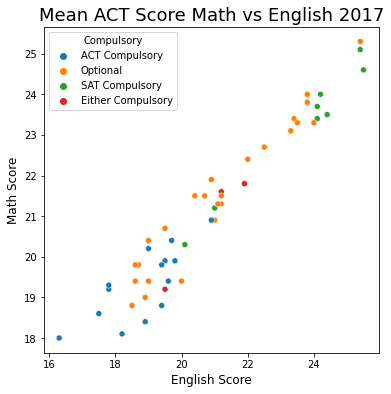

In [84]:
# plotting scatterplot for observations found in heatmap analysis

plot_scatter('act_english_2017', 
             'English Score', 
             'act_math_2017', 
             'Math Score', 
             'Mean ACT Score Math vs English 2017'
)

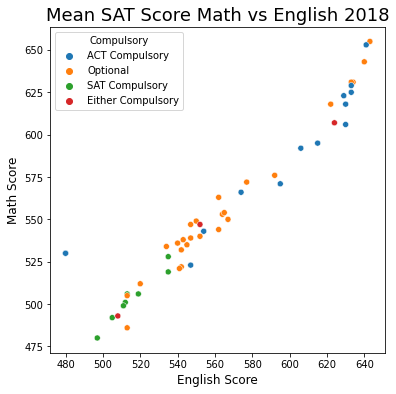

In [85]:
plot_scatter('sat_ebrw_2018', 
             'English Score', 
             'sat_math_2018', 
             'Math Score', 
             'Mean SAT Score Math vs English 2018'
)

There is a clearly positive relationship between students who score well in one section and other sections of the same test, and this holds true for both tests and years.

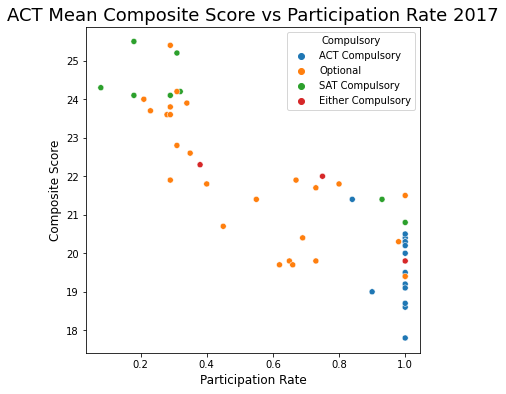

In [86]:
plot_scatter('act_participation_2017', 
             'Participation Rate', 
             'act_composite_2017', 
             'Composite Score', 
             'ACT Mean Composite Score vs Participation Rate 2017'
)

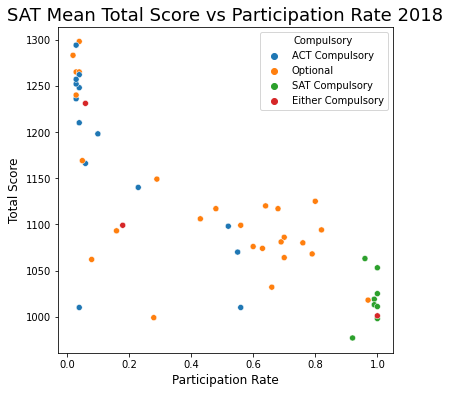

In [87]:
plot_scatter('sat_participation_2018', 
             'Participation Rate', 
             'sat_total_2018', 
             'Total Score', 
             'SAT Mean Total Score vs Participation Rate 2018'
)

Even though there are a few outliers, there is still a clearly negative relationship between students in states that are forced to take a certain test and their total score, and this holds true for both tests and years. Something of particular note is the density of students at the extremes of this scatterplot.

## Conclusions and Recommendations

Based on the exploration of the data, we can come to the conclusion that mandating tests does not fare well for the average student. If a student wishes to take either the SAT or ACT, they would naturally work hard for it. There would not be a necessity for compulsion.

Thus, it is advisable to make taking the tests non-compulsory.

Furthermore, we can also see that waiving fees for the tests (in non-compulsory states) increases the participation rate of the state, but also reduces the mean total / composite scores. This implies that there was an increase in students who took the test for no reason other than because it was free.

Thus, it is advisable to remove the waiver of fees as well.

Furthermore, we can also come to the conclusion that it is worth it to take a closer look at states with a low participation rate in either test and also low mean total / composite scores as that might reflect a low standard of education in those states.

Thus, it is advisable to reinvest the fee waiver into trying to improve the standard of education in those states instead.